In [1]:
import pandas as pd
from load_data import load_data
from data_processed_time_limit import data_processed_time_limit
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss
import time
import numpy as np
import matplotlib.pyplot as plt

2021-09-28 11:14:47.536811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-28 11:14:47.536829: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SEED = 123
imratio = 0.5
lr = .5e-06
num_epochs = 10
batch_size = 20
use_subset = False
# time_limits = np.array(range(5,30,5))
log_time = np.logspace(.01,1.5,5)
algo_list = [functional_square_loss, functional_square_hinge_loss, naive_square_hinge_loss, naive_square_loss]
str_algo_list = ['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss']
counts = pd.DataFrame(0, index=np.arange(3), columns= str_algo_list)

In [3]:
trainloader, testloader = load_data(SEED,use_subset, batch_size, imratio)
for x in range(4):
    print(x)
    for i in range(5):
        print(log_time[i])
        count = data_processed_time_limit(trainloader, testloader, algo_list[x], num_epochs, lr, log_time[i])
        counts.at[i, str_algo_list[x]] = count
counts

NUM_SAMPLES: [50000], POS:NEG: [25000 : 25000], POS_RATIO: 0.5000
NUM_SAMPLES: [10000], POS:NEG: [5000 : 5000], POS_RATIO: 0.5000
0
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
1
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
2
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
3
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793


,functional_square_loss,functional_square_hinge_loss,naive_square_hinge_loss,naive_square_loss
0,1100.0,340.0,240.0,260.0
1,1720.0,500.0,360.0,380.0
2,3520.0,1020.0,740.0,760.0
3,8040.0,2380.0,1720.0,1760.0
4,18300.0,5040.0,3980.0,4000.0


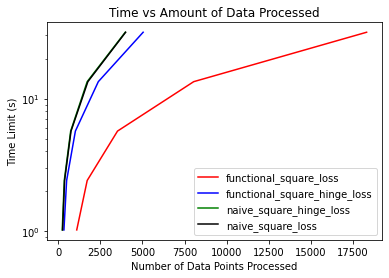

In [4]:
idx = log_time
plt.plot(counts['functional_square_loss'],idx,'r',
         counts['functional_square_hinge_loss'],idx,'b',
         counts['naive_square_hinge_loss'],idx,'g',
         counts['naive_square_loss'],idx,'k')
plt.legend(counts.columns)
plt.ylabel('Time Limit (s)')
plt.xlabel("Number of Data Points Processed")
plt.title("Time vs Amount of Data Processed")
plt.yscale("log")
# plt.show()
plt.savefig('../figures/DataVsTimeLog.png',transparent=False)